# Markov Chain Monte Carlo Methods in R

**Bayesian Inference of Artificial Neural Networks and Hidden Markov Models Hybrids**<br/>
Al-Ahmadgaid B. Asaad (`alstatr.blogspot.com`; `alasaadstat@gmail.com`)<br/>
<br/><br/>

This notebook meant to provide the source code for the Bayesian Inference of MCMC methods in Chapter 3.

### i. Monte Carlo Simulation
The following codes simulates the monte carlo method by approximating the area under the Gaussian distribution between -1.96 and 1.96.

In [1]:
library(magrittr)
library(lattice)

In [2]:
draws <- seq(1000, 100000, by = 100)
area <- draws %>% length %>% numeric

for (i in 1:(draws %>% length)) {
    samples <- rnorm(n = draws[i])
    area[i] <- sum(((samples > -1.96) & (samples < 1.96)) / (samples %>% length))
}

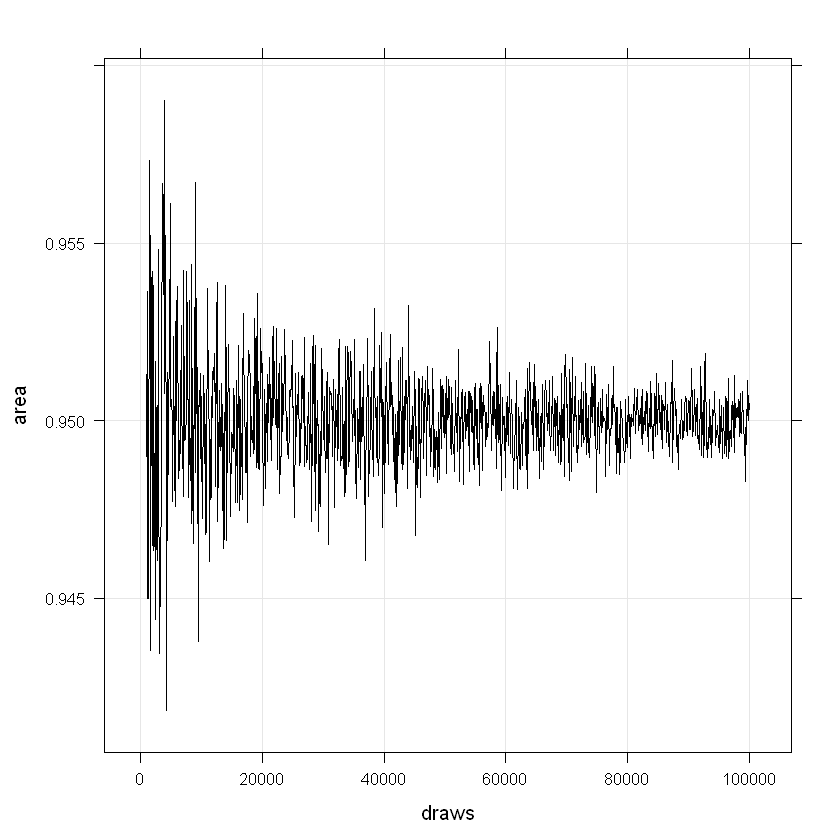

In [3]:
xyplot(area ~ draws, type = c("g", "l"), col = "black")

### ii. Metropolis-Hasting

The following codes illustrates the Metropolis-Hasting algorithm by using uniform distribution as the proposal distribution, with target distribution given by univariate Cauchy model.

In [4]:
r <- 100000
x <- r %>% numeric
x[1] <- 30

for (i in 1:(r - 1)) {
    proposal <- x[i] + runif(1, -1, 1)
    accept <- runif(1) < dcauchy(proposal) / dcauchy(x[i])
    
    if (accept == TRUE) {
        x[i + 1] = proposal
    } else {
        x[i + 1] = x[i]
    }
}

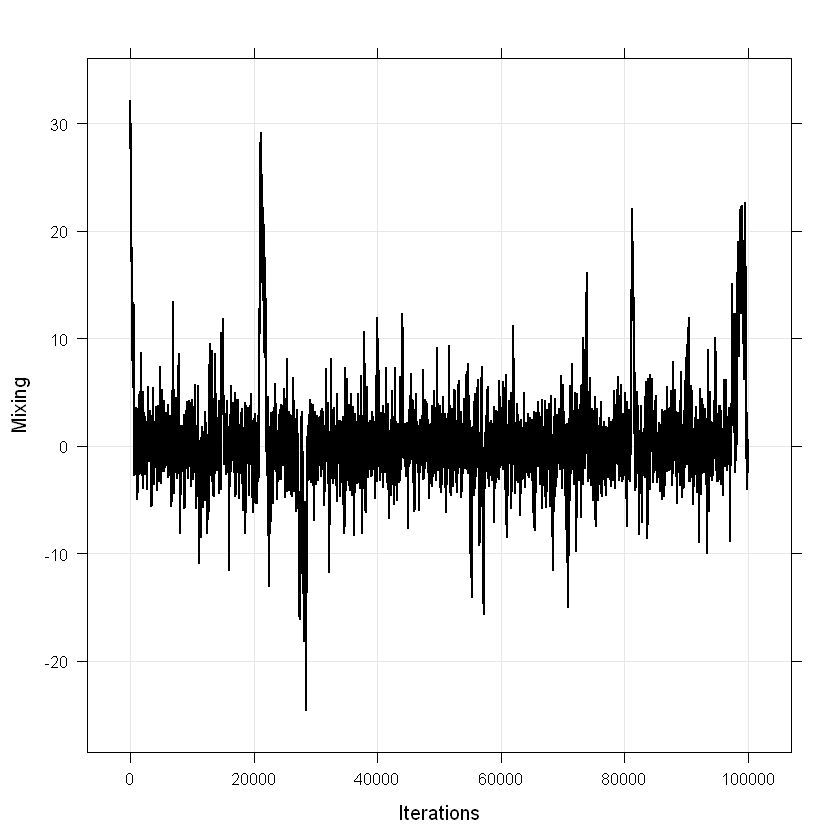

In [5]:
xyplot(x ~ 1:r, type = c("g", "l"), col = "black", lwd = 2,
       xlab = "Iterations", ylab = "Mixing")

In [ ]:
r = 100000
x = r |> zeros
x[1] = 30

for i in 1:r - 1
    proposal = x[i] + rand(Uniform(-1, 1))
    accept = rand(Uniform()) < pdf(Cauchy(), proposal) / pdf(Cauchy(), x[i])

    if accept == true
        x[i + 1] = proposal
    else
        x[i + 1] = x[i]
    end
end